# **TRAINING OF YOLOV3 for TO DETECT ILLEGAL FISHING BOATS**
### **Final Year project**
### Group 34
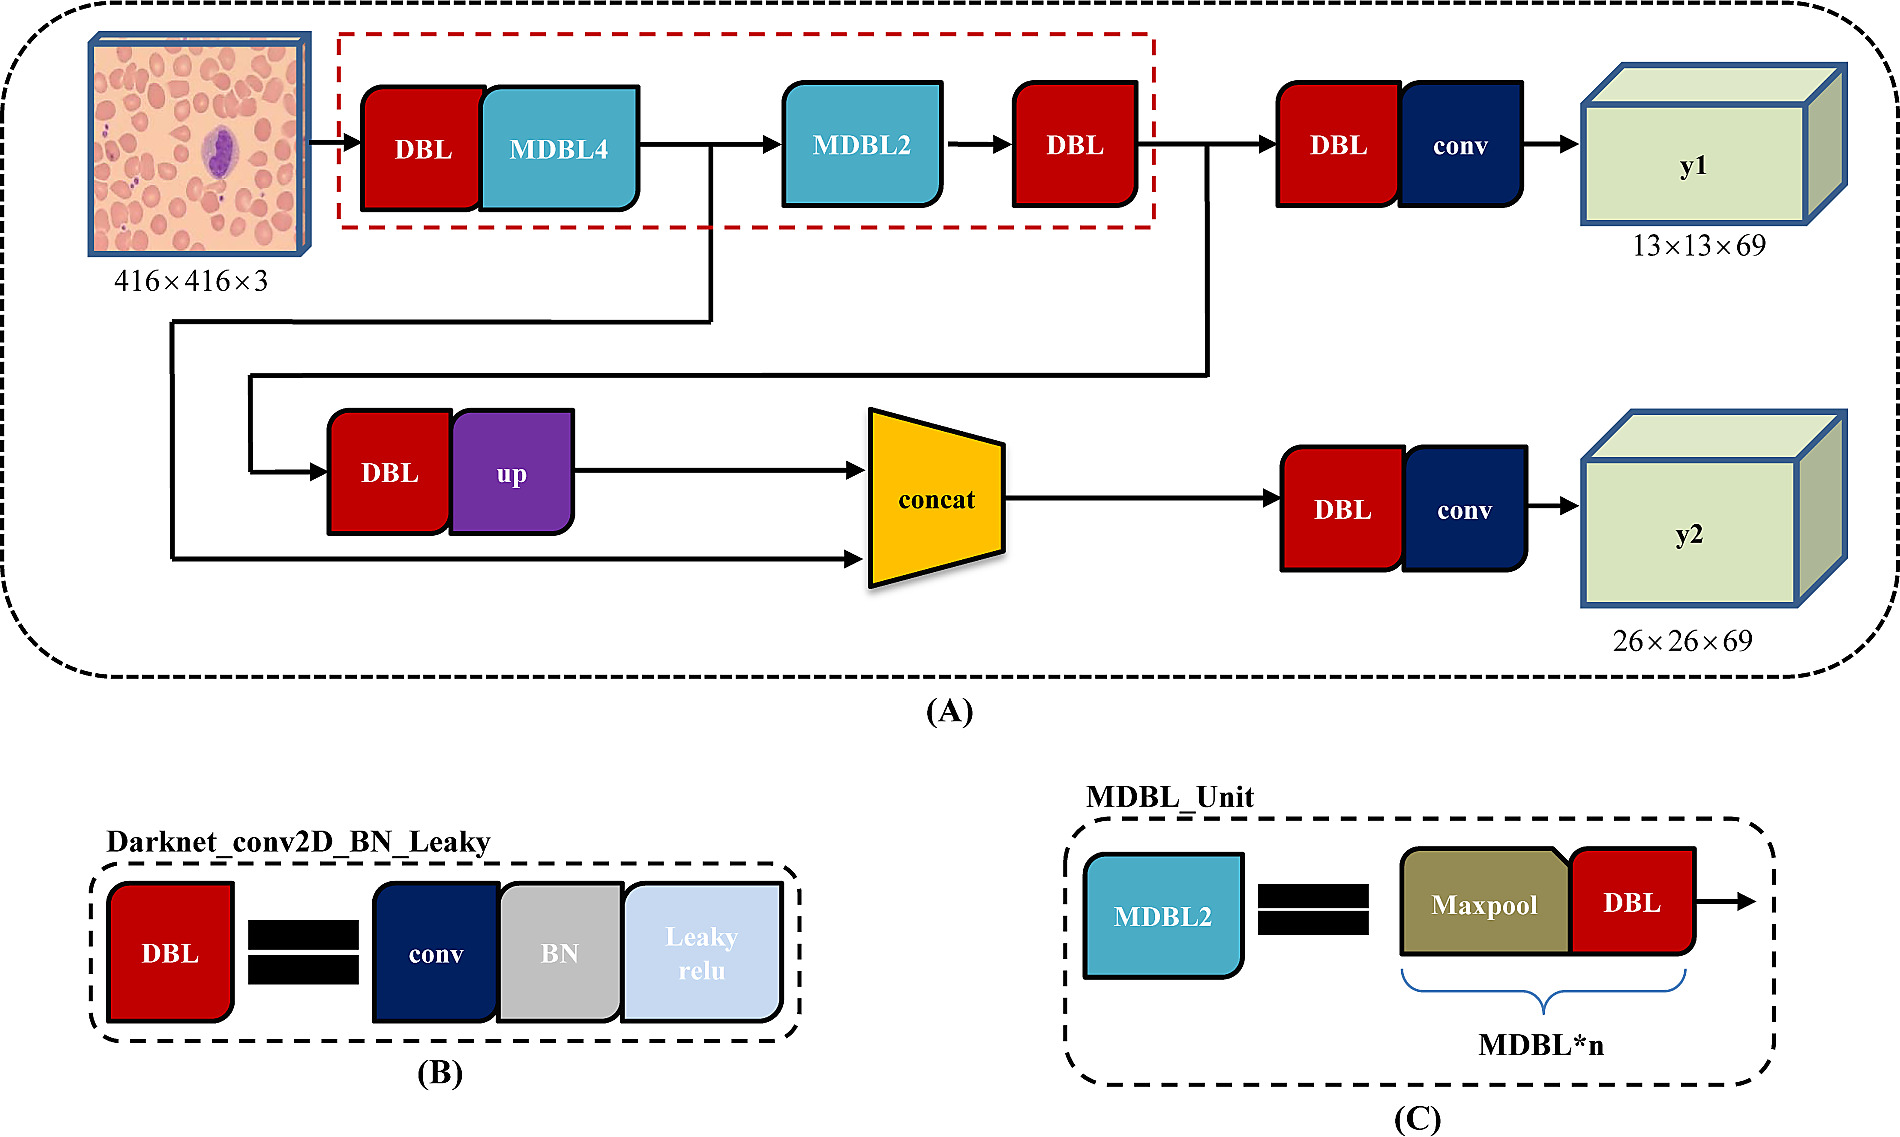


# Training
### **1) Clone `darknet` git repository onto the Colab VM** 

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15313, done.
remote: Total 15313 (delta 0), reused 0 (delta 0), pack-reused 15313
Receiving objects: 100% (15313/15313), 13.70 MiB | 18.21 MiB/s, done.
Resolving deltas: 100% (10402/10402), done.


### **2) Create *`yolov3-tiny`* and *`training`* folders in your drive**


### **3) Create & upload these files**

`What we need for training custom yolo detector`

a.   `Labeled Custom Dataset` 

b.   `Custom cfg file`

c.   `obj.data and obj.names files` 

d.   `process.py file (to create train.txt and test.txt files for training)`

**custom files on [GitHub](https://github.com/techzizou/yolov4-tiny-custom_Training).


### **3(a) Upload the Labeled custom dataset *`obj.zip`* file to the *`yolov3-tiny`* folder on your drive**


Create the zip file **obj.zip** from the **obj** folder containing both the input image ".jpg" files and their corresponding YOLO format labeled ".txt" files. 

Upload the zip file to the ***yolov3-tiny*** folder on your drive.


### **3(b) Create your custom *`config`* file and upload it to your drive**

Download the **yolov3-tiny-custom.cfg** file from ***darknet/cfg*** directory, make changes to it, and upload it to the ***yolov3-tiny*** folder on your drive .

You can also download the custom config files from the official [AlexeyAB Github](https://www.github.com/AlexeyAB/darknet)

**Change custom config file:**


*   batch=64
*   Subdivisions=16
*   Classes = 6
*   max_batches=12,000
*   steps= 9,600 10800
*   filter in yolo layers = 33 (2 yolo Layers)

### **3(c) Create *`obj.data`* and *`obj.names`* files and upload them to the drive**

### **3(d) Upload the *`process.py`* script file to the *`yolov4-tiny`* folder on your drive**

**To divide all image files into 2 parts. 90% for train and 10% for test.**

Download the ***`process.py`*** script from [GitHub](https://github.com/techzizou/yolov4-tiny-custom_Training).


### **4) Mount drive and link your folder**

In [2]:
3#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list contents in yolov3-tiny folder in your drive
!ls /mydrive/yolov3

/
Mounted at /content/gdrive
obj.data   process.py  yolov3-tiny_best.weights  yolov3-tiny_last.weights
obj.names  train.zip   yolov3-tiny.cfg


### **5) Make changes in the `makefile` to enable OPENCV and GPU**

In [3]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


### **6) Run `make` command to build darknet**

In [4]:
# build darknet 
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

### **7) Copy files from your drive to the darknet directory**

In [5]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

/content/darknet/data
/content/darknet


In [6]:
#copy the datasets zip file to the root darknet folder
!cp /mydrive/yolov3/train.zip ../

# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../train.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/train/004501.jpg   
  inflating: data/train/004501.txt   
  inflating: data/train/004502.jpg   
  inflating: data/train/004502.txt   
  inflating: data/train/004503.jpg   
  inflating: data/train/004503.txt   
  inflating: data/train/004504.jpg   
  inflating: data/train/004504.txt   
  inflating: data/train/004505.jpg   
  inflating: data/train/004505.txt   
  inflating: data/train/004506.jpg   
  inflating: data/train/004506.txt   
  inflating: data/train/004507.jpg   
  inflating: data/train/004507.txt   
  inflating: data/train/004508.jpg   
  inflating: data/train/004508.txt   
  inflating: data/train/004509.jpg   
  inflating: data/train/004509.txt   
  inflating: data/train/004510.jpg   
  inflating: data/train/004510.txt   
  inflating: data/train/004511.jpg   
  inflating: data/train/004511.txt   
  inflating: data/train/004512.jpg   
  inflating: data/train/004512.txt   
  inflating: data/train/004513.jpg   

In [7]:
#copy the custom cfg file from the drive to the darknet/cfg folder
!cp /mydrive/yolov3/yolov3-tiny.cfg ./cfg

In [8]:
# copy the obj.names and obj.data files so that they are now in /darknet/data/ folder
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [9]:
#copy the process.py file from the drive to the darknet directory
#Cahnge the process.py file obj-----> into the zip folder that Contins ship images
!cp /mydrive/yolov3/process.py ./

### **8) Run the *`process.py`* python script to create the *`train.txt`* & *`test.txt`* files inside the *data* folder**

In [10]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

/content/darknet
labels	obj.data  obj.names  test.txt  train  train.txt


### **9) Download the pre-trained *`yolov4-tiny`* weights**
Change the downloaded file name into yolov3-tiny.con.11

In [ ]:
# Download the yolov4-tiny pre-trained weights file
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29
!wget https://drive.google.com/u/0/uc?id=18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf&export=download

--2021-10-02 18:46:12--  https://drive.google.com/u/0/uc?id=18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf
Resolving drive.google.com (drive.google.com)... 142.251.8.138, 142.251.8.139, 142.251.8.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1bf91sb2u5qltt09i8t94f2eip95bir3/1633200300000/14889149095783116612/*/18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf [following]
--2021-10-02 18:46:12--  https://doc-0g-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1bf91sb2u5qltt09i8t94f2eip95bir3/1633200300000/14889149095783116612/*/18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf
Resolving doc-0g-7k-docs.googleusercontent.com (doc-0g-7k-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0g-7k-docs.googleusercontent.com (doc-0g-7k-docs.googleusercontent.com)|74.125.

### **10) Training**

## **Train your custom detector** 

For best results, you should stop the training when the average loss is less than 0.05 if possible or at least constantly below 0.3, else train the model until the average loss does not show any significant change for a while.

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov3-tiny.cfg yolov3-tiny.conv.11 -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 428944, rewritten_bbox = 0.265070 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.801699), count: 6, class_loss = 0.340884, iou_loss = 0.256957, total_loss = 0.597842 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.594068), count: 1, class_loss = 0.026755, iou_loss = 0.072059, total_loss = 0.098814 
 total_bbox = 428951, rewritten_bbox = 0.265298 % 

 (next mAP calculation at 5323 iterations) 
 Last accuracy mAP@0.50 = 92.94 %, best = 92.94 % 
 5307: 0.356115, 0.414618 avg loss, 0.001000 rate, 1.343696 seconds, 339648 images, 3.781096 hours left
Loaded: 0.299765 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.767960), count: 2, class_loss = 0.136208, iou_loss = 0.058076, total_loss = 0.194284 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

### **To restart your training (In case the training does not finish and you get disconnected)**



In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov3/training/yolov4-tiny-custom_last.weights -dont_show -map

### **11) Check performance** 



In [12]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')

#imShow('chart.png')

**MAP (mean average precision)**

In [13]:
#You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov3-tiny.cfg /mydrive/yolov3/yolov3-tiny_best.weights -points 0

CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Oct  3 2021 - 06:34:24 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #70
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


#Testing


### **Make changes to your custom config file**
*   change line batch to batch=1
*   change line subdivisions to subdivisions=1

In [15]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-tiny.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-tiny.cfg
%cd ..

/content/darknet/cfg
/content/darknet


### **Run detector on an image**

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov3/yolov3-tiny.cfg /mydrive/test_images/image1.jpg -thresh 0.3
imShow('predictions.jpg')

### Final Outputs
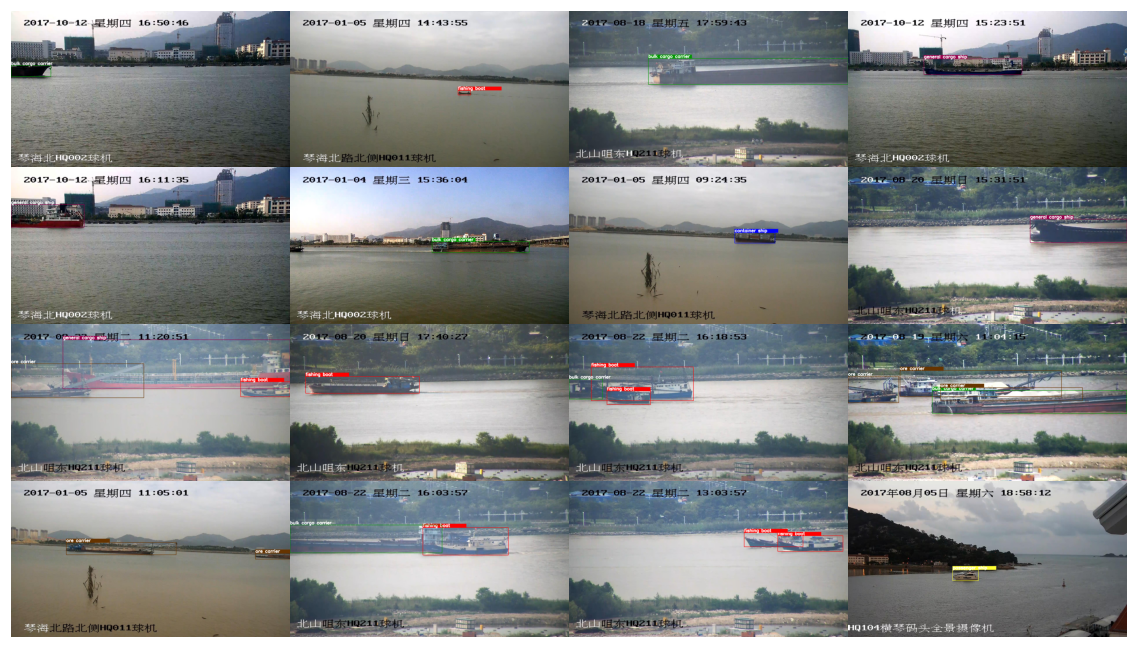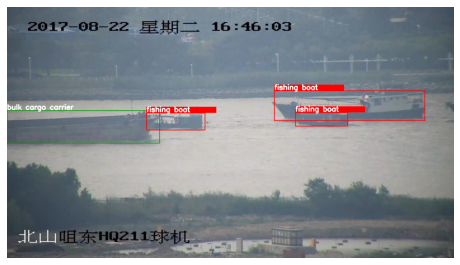